In [2]:
# Flood severity from changing link diameters.

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
output_path = Path(r"C:\Users\ay434\Box\Research\NSF_SCC\SWMM\Canandaigua\Output")
fps = [output_path / f'fault_db_L{i}.csv' for i in range(1, 6)]

df_list = [pd.read_csv(fp) for fp in fps]

print(df_list[1].head())

   15_depth  16_depth  18_depth  19_depth  20_depth  17_depth   
0   0.00000  0.000000  0.000000  0.000000   0.00000   0.00000  \
1   0.00000  0.000000  0.000000  0.000000   0.00000   0.00000   
2   0.00000  0.000000  0.000000  0.000000   0.00000   0.00000   
3   0.00000  0.000000  0.000000  0.000000   0.00000   0.00000   
4   0.06021  0.071772  0.152333  0.057376   0.06352   0.04151   

              datetime      prcp  15_flood  16_flood  18_flood  19_flood   
0  2017-01-01 00:15:00  0.000000       0.0       0.0       0.0       0.0  \
1  2017-01-01 00:30:00  0.000000       0.0       0.0       0.0       0.0   
2  2017-01-01 00:45:00  0.000000       0.0       0.0       0.0       0.0   
3  2017-01-01 01:00:00  0.066667       0.0       0.0       0.0       0.0   
4  2017-01-01 01:15:00  0.066667       0.0       0.0       0.0       0.0   

   20_flood  17_flood Experiment  L2_diam  
0       0.0       0.0        E_1      3.0  
1       0.0       0.0        E_1      3.0  
2       0.0       0.

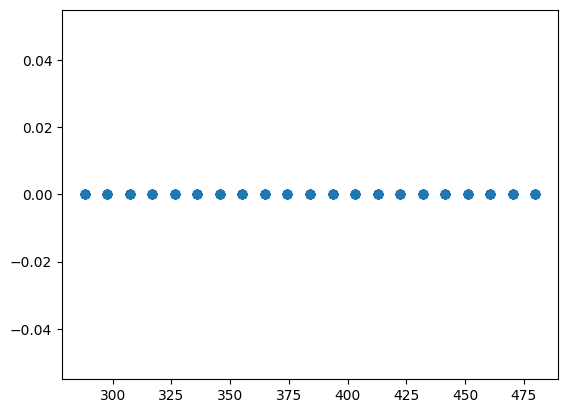

In [17]:
# Cumulative flooding at a node for changes in a given link diameter.
link_id = 2
node_id = 15

link_df = pd.read_csv(output_path / f'fault_db_L{link_id}.csv')

# Groupby experiment and sum.
link_df_group_sum = link_df.groupby(by='Experiment').sum()
link_df_group_mean = link_df.groupby(by='Experiment').sum()


fig, ax = plt.subplots()
ax.scatter(link_df_group_mean['L2_diam'], link_df_group_sum[f'{node_id}_flood'] / link_df_group_sum[f'prcp'])

In [23]:
# Cumulative flooding at each diameter.
links = list(range(1,6))
flood_cols = [f'{i}_flood' for i in range(17,21)]
flood_dfs = []
for i, df in enumerate(df_list):
    group_df = df[flood_cols + ['L2_diam']].groupby(['L2_diam']).sum()
    cumu_flooding = group_df.sum(axis=1)
    flood_dfs.append(cumu_flooding)

Text(0, 0.5, 'Cumulative Flooding')

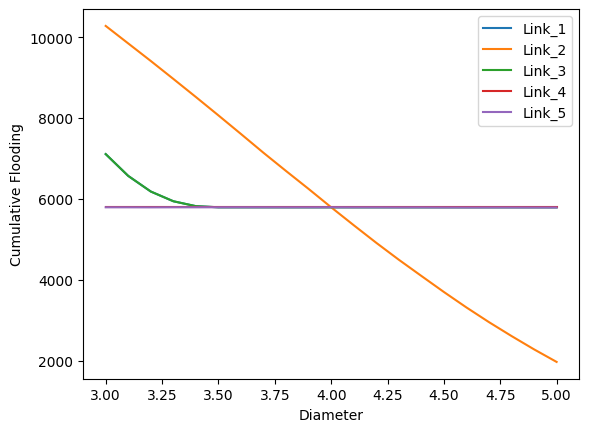

In [26]:
# Plot the cumulative flooding for each link diameter.
fig, ax = plt.subplots()
for i, link in enumerate(links):
    flood_df = flood_dfs[i]
    ax.plot(flood_df.index, flood_df, label=f'Link_{link}')
    
ax.legend()
ax.set_xlabel('Diameter')
ax.set_ylabel('Cumulative Flooding')